In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

from Finite_volume_method_1D import *

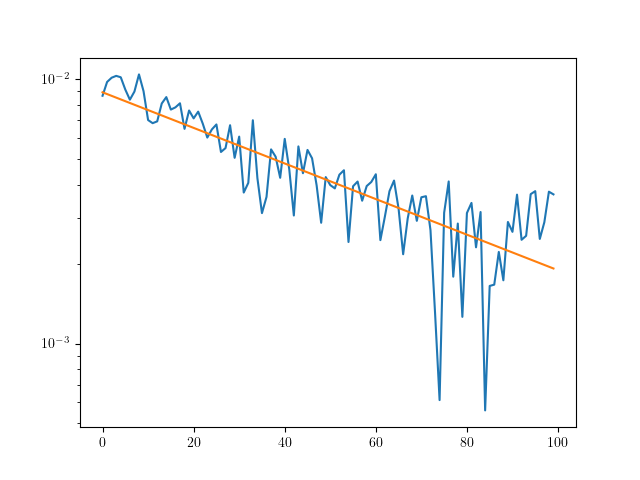

In [3]:
chippath = '../../DataKian/bTa_LT278W2chip5/'
filename = 'KID5_103dBm__TmK20_avgpulse_ampphase.csv'
length = 90

lambdanm = 402
KID402 = KID_data(chippath,lambdanm,filename,length)
KID402.fit_tail(start=150,end=250)


In [4]:
params = KID_params(eta_pb=consts.eta_pb_max,sigma_IC=0.5,Teff=0.11,KID=KID402)

#check inverse of nqp(Teff)
a = 2*params.N0*params.height*params.width*np.sqrt(2*np.pi*consts.k_B*params.Delta)
b = params.Delta/consts.k_B
np.real(2*b/lambertw(2*a**2*b/(params.Q0**2)))

0.11

In [5]:
SIM = KID_sim(params=params,dt_init=0.01,dx_or_fraction=1/10)

 99%|█████████▉| time (us): 100.94283407312957 


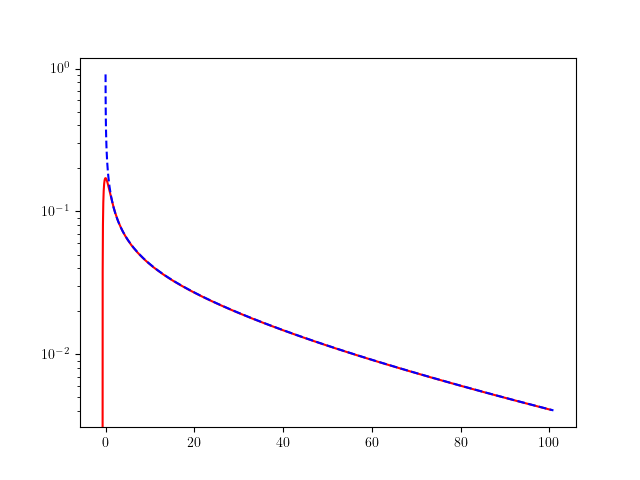

In [6]:
plt.figure()
plt.semilogy(SIM.t_axis_interp,SIM.phaseintime,color='r')
plt.semilogy(SIM.t_axis,SIM.Nqpintime*SIM.dthetadN,color='b',ls='--')
plt.show()